## Homework:

1.Given the iris data set, use the last two features "petal length" and "petal width" to predict the "species". Build a logistic regression and:

- (1) Print out the accuracy
- (2) Make a prediction given a new observation $\text{petal length} = 7$, $\text{petal width}=4$, as well as the probabilities $p(y=i|x)$.
- (3) Plot the linear boundaries, and compare it with the LDA's boundary.



In [1]:
import numpy as np
import pandas as pd
from __future__ import print_function
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import linear_model
%pylab inline

iris = datasets.load_iris()
iris.x = iris.data[:, [2,3]]
iris.y = iris.target

logit = linear_model.LogisticRegression()
logit.fit(iris.x, iris.y)

print('logistic regression accuracy is: ' + str(logit.score(iris.x, iris.y)))
#print('Prediction of new observation is: ' + str(logit.predict([7,4])))

predict_array = np.array([7,4]).reshape(1,-1)

print('the prediction of the new observation is ' + str(logit.predict(predict_array)))
print('probability that it belongs to each class ' + str(logit.predict_proba(predict_array)))      


Populating the interactive namespace from numpy and matplotlib
logistic regression accuracy is: 0.8733333333333333
the prediction of the new observation is [2]
probability that it belongs to each class [[1.62999770e-05 1.10275904e-01 8.89707796e-01]]


In [2]:
#load graphs

def data_2Dplot(x, y, legends=None, xlabel=None, ylabel=None):
    x, y = np.array(x), np.array(y)
    if legends is None:
        legends = np.unique(y)
    col = ["r", "g", "b", "m", "c", "k"]
    ## plot the data points
    for i in np.unique(y):
        plt.scatter(x[y==i,0], x[y==i,1], c=col[i%6], s=25, label=legends[i])
    
    if xlabel:
        plt.xlabel(xlabel,size=12)
    if ylabel:
        plt.ylabel(ylabel,size=12)
    plt.legend(loc=2)
    del_0, del_1 = (max(x[:,0]) - min(x[:,0]))*.1, (max(x[:,1]) - min(x[:,1]))*.1
    plt.axis([
        min(x[:,0]) - del_0, max(x[:,0]) + del_0,
        min(x[:,1]) - del_1, max(x[:,1]) + del_1]
    )

def logistic_model_2Dplot(x, model):
    # import warnings
    # warnings.warn('Does not work for all problems. (Works only for binary label?)')
    
    def plot_y(x_1, model=model):
        ## np.column_stack() combines intercept with coefficents
        for coef in np.column_stack((model.intercept_, model.coef_)):
            ## take b0, b1, b2 for one boundary at a time 
            b_0, b_1, b_2 = coef[:3]
            # given 1, calculate corresponding x2
            # http://python-future.org/compatible_idioms.html
            # Idiomatic Py3, but inefficient on Py2
            yield list(map(lambda x: -(b_0 + b_1*x) / b_2, x_1))
    
    x = np.array(x)
    x_a = [min(x[:,0]), max(x[:,0])]
    col = ["r", "g", "b", "m", "c", "k"]
    for i, x_b in enumerate(plot_y(x_a, model)):
        plt.plot(x_a, x_b, c=col[i])

def plot_model(model, x, y, label):
    '''
    model: a fitted model
    x, y: two variables, should be numpy arrays
    label: true label
    '''
    x_min = x.min() - 1
    x_max = x.max() + 1
    y_min = y.min() - 1
    y_max = y.max() + 1
    import  matplotlib.pyplot as plt
    from matplotlib import colors
    colDict = {
        'red': [(0, 1, 1), (1, 0.7, 0.7)],
        'green': [(0, 1, 0.5), (1, 0.7, 0.7)],
        'blue': [(0, 1, 0.5), (1, 1, 1)]
    }
    cmap = colors.LinearSegmentedColormap('red_blue_classes', colDict)
    plt.cm.register_cmap(cmap=cmap)
    nx, ny = 200, 200
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ## plot colormap
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes')
    ## plot boundaries
    plt.contour(xx, yy, Z, [0.5], linewidths=1., colors='k')
    plt.contour(xx, yy, Z, [1], linewidths=1., colors='k')
    ## plot scatters and true labels
    plt.scatter(x, y, c=label)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

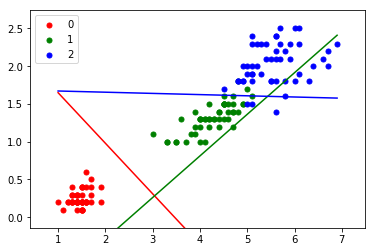

In [3]:
# Plot data points    
data_2Dplot(iris.data[:,2:],iris.target)
#Plot decision boundary
logistic_model_2Dplot(iris.data[:,2:], logit)

plt.show()

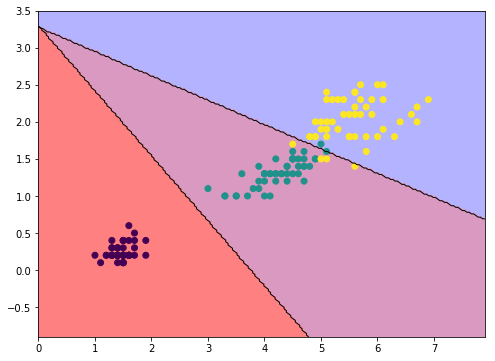

In [4]:
from sklearn import discriminant_analysis
LDA = discriminant_analysis.LinearDiscriminantAnalysis()
LDA.fit(iris.data[:,2:], iris.target)

def plotModel(model, x, y, label):
    '''
    model: a fitted model
    x, y: two variables, should be np.arrays
    label: true label
    '''
    x_min = x.min() - 1
    x_max = x.max() + 1
    y_min = y.min() - 1
    y_max = y.max() + 1
    import  matplotlib.pyplot as pl
    from matplotlib import colors
    colDict = {'red': [(0, 1, 1), (1, 0.7, 0.7)],
               'green': [(0, 1, 0.5), (1, 0.7, 0.7)],
               'blue': [(0, 1, 0.5), (1, 1, 1)]}
    cmap = colors.LinearSegmentedColormap('red_blue_classes', colDict)
    pl.cm.register_cmap(cmap=cmap)
    nx, ny = 200, 200
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ## plot colormap
    pl.pcolormesh(xx, yy, Z, cmap='red_blue_classes')
    ## plot boundaries
    pl.contour(xx, yy, Z, [0.5], linewidths=1., colors='k')
    pl.contour(xx, yy, Z, [1], linewidths=1., colors='k')
    ## plot scatters ans true labels
    pl.scatter(x, y, c = label)
    pl.xlim(x_min, x_max)

    pl.ylim(y_min, y_max)

plt.rcParams['figure.figsize'] = 8,6
plotModel(LDA, iris.data[:,2], iris.data[:,3], iris.target)

2.There are three files in the "data" folder:

    - "spam_train.csv"
    - "spam_test.csv"
    - "spam.txt"

The file "spam_train.csv" in the "data" folder contains 2300 emails and 58 variables. The last variable "spam" is a factor with two levels: "email", "spam". If you want to know more information about the data set, please read the file "spam.txt".

Your assignment is based on the "spam_train.csv" file, try to build a classifier to predict the variable "spam". You need to write a report which contains:

- (1) The features you are using to build the model.
- (2) At least two models we have learned.
- (3) After building the models, report the corresponding accuracy on the training set.
- (4) Use you models to make prediction on the "spam_test.csv" file, report the corresponding accuracy on this test set.
- (5) Compare the performance of the models in the following two aspect:
    - (a) the performance of two different models.
    - (b) the performance of one model on the training set and test set.
    
The following codes may be a useful beginning:

In [59]:
import pandas as pd
import numpy as np
train = pd.read_csv('/Users/patrickcullinane/Desktop/exercise2/data/spam_train.csv')
test = pd.read_csv('/Users/patrickcullinane/Desktop/exercise2/data/spam_test.csv')
## separate the predictors and response in the training data set
x = np.array(train.iloc[:, 0:57])
y = np.array(train.iloc[:, -1])
## separate the predictors and response in the test data set
x2 = np.array(test.iloc[:, 0:57])
y2 = np.ravel(test.iloc[:, -1])

## have a look at the training data set
train.head()

,A.1,A.2,A.3,A.4,A.5,A.6,A.7,A.8,A.9,A.10,...,A.49,A.50,A.51,A.52,A.53,A.54,A.55,A.56,A.57,spam
0,0.32,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.0,0.234,0.0,0.058,0.0,0.0,1.068,3,47,email
1,0.00,0.0,0.71,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.342,0.0,0.0,1.000,1,31,email
2,0.00,0.0,0.00,0.0,0.00,0.17,0.0,0.0,0.0,0.0,...,0.0,0.055,0.0,0.000,0.0,0.0,1.685,7,204,email
3,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.000,0.0,0.0,1.800,5,9,email
4,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.471,0.0,0.000,0.0,0.0,1.424,8,47,email


In [60]:
from sklearn import linear_model, discriminant_analysis, neighbors, naive_bayes
logit = linear_model.LinearRegression()
Lda = discriminant_analysis.LinearDiscriminantAnalysis()
knn = neighbors.KNeighborsClassifier()
gnb = naive_bayes.GaussianNB()
mnb = naive_bayes.MultinomialNB()

In [63]:
Lda.fit(x,y)
knn.fit(x,y) 
gnb.fit(x,y)
mnb.fit(x,y)

score_train = [Lda.score(x,y), knn.score(x,y), gnb.score(x,y), mnb.score(x,y)]
score_test = [Lda.score(x2,y2), knn.score(x2,y2), gnb.score(x2,y2), mnb.score(x2,y2)]
print(np.array([score_train, score_test]))

[[0.89173913 0.85347826 0.83086957 0.81086957]
 [0.8970013  0.78835289 0.81703607 0.79878314]]


In [55]:
#sklearn logistic regression will not work with strings
#def encode():
    #if 'email' x == 1 else x == 0
    
y_new = y
y_encode = []
for i in range(len(y)):
    if y_new[i] == 'email':
        y_new[i] = 1
        y_encode.append(y_new[i])
    else:
        y_new[i] = 0
        y_encode.append(y_new[i])

y_encode = np.array(y_encode)      

In [65]:
logit.fit(x,y_encode)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
score_train2 = [logit.score(x,y_encode)]
score_test2 = [logit.score(x,y_encode)]
print(np.array([score_train2, score_test2]))

[[0.55960406]
 [0.55960406]]
